In [4]:
from gensim import models
ko_model = models.fasttext.load_facebook_model("cc.ko.300.bin.gz")

In [5]:
with open("dataset_train1.txt",'r',encoding="utf-8") as file:
    contents = file.readlines()

In [6]:
dataset = []
for i in contents:
    dataset.append(i.split(" "))

label = []
for i in dataset:
    if "__label__일반\t" in i[0]:   
        i[0] = i[0].replace("__label__일반\t","")
        label.append(0)
    else:
        i[0] = i[0].replace("__label__보이스피싱\t","")
        label.append(1)

In [7]:
x_data = []
for i in dataset:
    input_data = []
    for j in i:
        input_data.append(ko_model.wv[j].tolist())
    x_data.append(input_data)

In [8]:
max_value = 0
sum_value = 0
for i in x_data:
    print(len(i))
    max_value = max(max_value,len(i))
    sum_value+=len(i)

434
345
358
346
338
310
335
393
609
357
296
369
560
319
674
426
305
446
397
521
367
591
331
371
411
312
362
386
349
390
299
317
366
405
263
357
345
676
474
334
393
431
462
334
269
345
289
324
339
324
395
370
313
301
345
371
336
389
261
311
309
328
374
507
291
359
8
441
456
331
300
296
310
396
295
371
453
309
329
315
658
568
418
480
291
466
307
385
364
456
590
324
412
572
521
473
536
315
296
305
320
307
387
364
333
462
383
459
457
419
402
324
304
316
357
319
344
418
313
429
358
341
696
445
387
702
302
414
460
526
367
351
295
419
1053
313
774
331
357
529
401
377
1049
408
378
556
304
299
434
337
358
408
624
338
370
441
360
295
447
439
314
327
422
367
339
372
316
446
290
500
331
844
453
332
336
336
387
430
385
367
288
330
352
403
339
504
439
325
327
445
318
292
349
382
444
422
328
498
368
370
328
410
347
383
309
422
660
312
435
453
322
409
469
469
433
364
401
313
338
302
320
442
422
317
397
495
336
602
322
494
346
412
850
442
309
306
358
292
430
406
341
314
485
397
302
310
328
295
513
346


In [9]:
max_value

7493

In [10]:
padding_vector = [0.0]*300

In [11]:
for i in x_data:
    for j in range(max_value-len(i)):
        i.append(padding_vector)

In [12]:
for i in range(len(x_data)):
    x_data[i] = x_data[i][:600]

In [13]:
len(x_data[899])

600

In [14]:
train_X = x_data[:700]
train_Y = label[:700]

test_X = x_data[700:]
test_Y = label[700:]

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.9.1'

In [3]:
device_name = tf.test.gpu_device_name()
device_name

'/device:GPU:0'

In [16]:
with tf.device(device_name):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(3,(70,40),activation='relu', input_shape=(600, 300, 1)),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(3,(70,40),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Conv2D(3,(70,40),activation='relu'),
        tf.keras.layers.MaxPooling2D((2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dense(2,activation='softmax')
    ])
    print("모델 정의 완료")
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    print("model compile complet")
    history = model.fit(train_X, train_Y, epochs=600, batch_size=10,validation_data=(test_X, test_Y))

모델 정의 완료
model compile complet
Epoch 1/600
70/70 [==============================] - 856s 2s/step - loss: 0.7062 - accuracy: 0.6357 - val_loss: 0.8936 - val_accuracy: 0.0000e+00
Epoch 2/600
70/70 [==============================] - 22s 319ms/step - loss: 0.6529 - accuracy: 0.6429 - val_loss: 1.0231 - val_accuracy: 0.0000e+00
Epoch 3/600
70/70 [==============================] - 23s 330ms/step - loss: 0.6523 - accuracy: 0.6429 - val_loss: 1.0296 - val_accuracy: 0.0000e+00
Epoch 4/600
70/70 [==============================] - 24s 338ms/step - loss: 0.6522 - accuracy: 0.6429 - val_loss: 1.0218 - val_accuracy: 0.0000e+00
Epoch 5/600
70/70 [==============================] - 24s 346ms/step - loss: 0.6529 - accuracy: 0.6429 - val_loss: 1.0486 - val_accuracy: 0.0000e+00
Epoch 6/600
70/70 [==============================] - 24s 342ms/step - loss: 0.6528 - accuracy: 0.6429 - val_loss: 1.0307 - val_accuracy: 0.0000e+00
Epoch 7/600
70/70 [==============================] - 24s 344ms/step - loss: 0.6527 

Epoch 56/600
70/70 [==============================] - 26s 369ms/step - loss: 0.6525 - accuracy: 0.6429 - val_loss: 1.0180 - val_accuracy: 0.0000e+00
Epoch 57/600
70/70 [==============================] - 26s 374ms/step - loss: 0.6529 - accuracy: 0.6429 - val_loss: 1.0092 - val_accuracy: 0.0000e+00
Epoch 58/600
70/70 [==============================] - 26s 375ms/step - loss: 0.6526 - accuracy: 0.6429 - val_loss: 1.0126 - val_accuracy: 0.0000e+00
Epoch 59/600
70/70 [==============================] - 26s 373ms/step - loss: 0.6523 - accuracy: 0.6429 - val_loss: 1.0253 - val_accuracy: 0.0000e+00
Epoch 60/600
70/70 [==============================] - 26s 369ms/step - loss: 0.6523 - accuracy: 0.6429 - val_loss: 1.0147 - val_accuracy: 0.0000e+00
Epoch 61/600
70/70 [==============================] - 26s 367ms/step - loss: 0.6524 - accuracy: 0.6429 - val_loss: 1.0515 - val_accuracy: 0.0000e+00
Epoch 62/600
70/70 [==============================] - 26s 366ms/step - loss: 0.6526 - accuracy: 0.6429 - v

Epoch 111/600
70/70 [==============================] - 25s 364ms/step - loss: 0.6523 - accuracy: 0.6429 - val_loss: 1.0376 - val_accuracy: 0.0000e+00
Epoch 112/600
70/70 [==============================] - 25s 360ms/step - loss: 0.6523 - accuracy: 0.6429 - val_loss: 1.0250 - val_accuracy: 0.0000e+00
Epoch 113/600
70/70 [==============================] - 26s 373ms/step - loss: 0.6521 - accuracy: 0.6429 - val_loss: 1.0422 - val_accuracy: 0.0000e+00
Epoch 114/600
70/70 [==============================] - 26s 366ms/step - loss: 0.6528 - accuracy: 0.6429 - val_loss: 1.0275 - val_accuracy: 0.0000e+00
Epoch 115/600
70/70 [==============================] - 26s 373ms/step - loss: 0.6522 - accuracy: 0.6429 - val_loss: 1.0524 - val_accuracy: 0.0000e+00
Epoch 116/600
70/70 [==============================] - 25s 361ms/step - loss: 0.6524 - accuracy: 0.6429 - val_loss: 1.0301 - val_accuracy: 0.0000e+00
Epoch 117/600
70/70 [==============================] - 25s 355ms/step - loss: 0.6525 - accuracy: 0.6

Epoch 220/600
70/70 [==============================] - 26s 371ms/step - loss: 0.6520 - accuracy: 0.6429 - val_loss: 1.0256 - val_accuracy: 0.0000e+00
Epoch 221/600
70/70 [==============================] - 27s 380ms/step - loss: 0.6521 - accuracy: 0.6429 - val_loss: 1.0320 - val_accuracy: 0.0000e+00
Epoch 222/600
70/70 [==============================] - 26s 366ms/step - loss: 0.6521 - accuracy: 0.6429 - val_loss: 1.0203 - val_accuracy: 0.0000e+00
Epoch 223/600
70/70 [==============================] - 26s 371ms/step - loss: 0.6524 - accuracy: 0.6429 - val_loss: 1.0355 - val_accuracy: 0.0000e+00
Epoch 224/600
70/70 [==============================] - 27s 381ms/step - loss: 0.6522 - accuracy: 0.6429 - val_loss: 1.0367 - val_accuracy: 0.0000e+00
Epoch 225/600
70/70 [==============================] - 26s 368ms/step - loss: 0.6533 - accuracy: 0.6429 - val_loss: 1.0389 - val_accuracy: 0.0000e+00
Epoch 226/600
70/70 [==============================] - 27s 380ms/step - loss: 0.6527 - accuracy: 0.6

Epoch 329/600
70/70 [==============================] - 27s 381ms/step - loss: 0.6520 - accuracy: 0.6429 - val_loss: 1.0335 - val_accuracy: 0.0000e+00
Epoch 330/600
70/70 [==============================] - 26s 375ms/step - loss: 0.6524 - accuracy: 0.6429 - val_loss: 1.0151 - val_accuracy: 0.0000e+00
Epoch 331/600
70/70 [==============================] - 27s 385ms/step - loss: 0.6523 - accuracy: 0.6429 - val_loss: 1.0295 - val_accuracy: 0.0000e+00
Epoch 332/600
70/70 [==============================] - 26s 379ms/step - loss: 0.6520 - accuracy: 0.6429 - val_loss: 1.0342 - val_accuracy: 0.0000e+00
Epoch 333/600
70/70 [==============================] - 26s 369ms/step - loss: 0.6523 - accuracy: 0.6429 - val_loss: 1.0276 - val_accuracy: 0.0000e+00
Epoch 334/600
70/70 [==============================] - 27s 386ms/step - loss: 0.6524 - accuracy: 0.6429 - val_loss: 1.0349 - val_accuracy: 0.0000e+00
Epoch 335/600
70/70 [==============================] - 27s 380ms/step - loss: 0.6525 - accuracy: 0.6

Epoch 438/600
70/70 [==============================] - 26s 378ms/step - loss: 0.6521 - accuracy: 0.6429 - val_loss: 1.0377 - val_accuracy: 0.0000e+00
Epoch 439/600
70/70 [==============================] - 27s 382ms/step - loss: 0.6520 - accuracy: 0.6429 - val_loss: 1.0361 - val_accuracy: 0.0000e+00
Epoch 440/600
70/70 [==============================] - 26s 377ms/step - loss: 0.6521 - accuracy: 0.6429 - val_loss: 1.0261 - val_accuracy: 0.0000e+00
Epoch 441/600
70/70 [==============================] - 26s 372ms/step - loss: 0.6520 - accuracy: 0.6429 - val_loss: 1.0348 - val_accuracy: 0.0000e+00
Epoch 442/600
70/70 [==============================] - 26s 376ms/step - loss: 0.6524 - accuracy: 0.6429 - val_loss: 1.0402 - val_accuracy: 0.0000e+00
Epoch 443/600
70/70 [==============================] - 26s 378ms/step - loss: 0.6518 - accuracy: 0.6429 - val_loss: 1.0241 - val_accuracy: 0.0000e+00
Epoch 444/600
70/70 [==============================] - 26s 375ms/step - loss: 0.6521 - accuracy: 0.6

Epoch 547/600
70/70 [==============================] - 27s 385ms/step - loss: 0.6519 - accuracy: 0.6429 - val_loss: 1.0358 - val_accuracy: 0.0000e+00
Epoch 548/600
70/70 [==============================] - 27s 382ms/step - loss: 0.6522 - accuracy: 0.6429 - val_loss: 1.0233 - val_accuracy: 0.0000e+00
Epoch 549/600
70/70 [==============================] - 27s 380ms/step - loss: 0.6523 - accuracy: 0.6429 - val_loss: 1.0209 - val_accuracy: 0.0000e+00
Epoch 550/600
70/70 [==============================] - 28s 398ms/step - loss: 0.6522 - accuracy: 0.6429 - val_loss: 1.0289 - val_accuracy: 0.0000e+00
Epoch 551/600
70/70 [==============================] - 28s 402ms/step - loss: 0.6520 - accuracy: 0.6429 - val_loss: 1.0334 - val_accuracy: 0.0000e+00
Epoch 552/600
70/70 [==============================] - 27s 381ms/step - loss: 0.6520 - accuracy: 0.6429 - val_loss: 1.0225 - val_accuracy: 0.0000e+00
Epoch 553/600
70/70 [==============================] - 26s 371ms/step - loss: 0.6521 - accuracy: 0.6

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 531, 261, 3)       8403      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 265, 130, 3)      0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 196, 91, 3)        25203     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 98, 45, 3)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 6, 3)          25203     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 3, 3)        

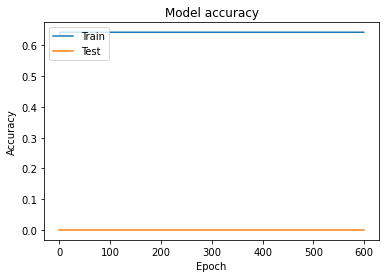

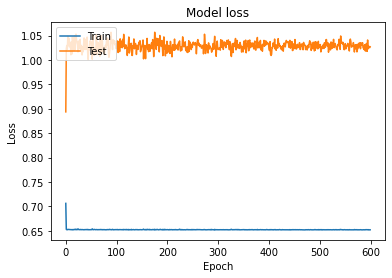

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
